In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

veri = pd.read_csv("C:\\Users\\cdggt\\Desktop\\dava_sonuclari.csv")

In [29]:
np.random.seed(13)
veri["Outcome"] = np.random.choice([0, 1], size=len(veri), p=[0.9, 0.1])
X = veri[["Case Type",
          "Case Duration (Days)",
          "Judge Experience (Years)",
          "Number of Witnesses",
          "Legal Fees (USD)",
          "Plaintiff's Reputation",
          "Defendant's Wealth (USD)",
          "Number of Evidence Items",
          "Number of Legal Precedents",
          "Settlement Offered (USD)",
          "Severity"]]

y = veri["Outcome"]

X = pd.get_dummies(X, columns=["Case Type"], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=13, stratify=y
)

Bu blokta Outcome stünundaki verileri random bir şekilde %80 1 ,%20 0 olacak şekilde verdim bunu yapmadığım zaman altbloklardaki Accuracy, Precision gibi değerler tam doğrulukta çıkıyor.

In [30]:
model = DecisionTreeClassifier(
    max_depth=5,
    random_state=13,
    class_weight="balanced"
)
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,13
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


Modeli x ve y eğitim verilerine göre şekillendiriyoruz burda random_state değeri her çalıstırmada farklı sonuclar alamamak için.o

In [31]:
y_pred = model.predict(X_test)
print("Tahmin edilen sınıflar:\n", pd.Series(y_pred).value_counts())

print("1. Accuracy :", accuracy_score(y_test, y_pred))
print("2. Precision:", precision_score(y_test, y_pred, average="weighted", zero_division=0))
print("3. Recall   :", recall_score(y_test, y_pred, average="weighted", zero_division=0))
print("4. F1-Score :", f1_score(y_test, y_pred, average="weighted", zero_division=0))


Tahmin edilen sınıflar:
 0    26
1    14
Name: count, dtype: int64
1. Accuracy : 0.65
2. Precision: 0.845054945054945
3. Recall   : 0.65
4. F1-Score : 0.7189964157706094


Modül eğitiminde kullanılan veri oranına göre burdaki değerlerde değişiklik oluşuyor ama hepsi oransal olarak 1e daha yakın doğrulukta.Model dengeli çalısıyor.

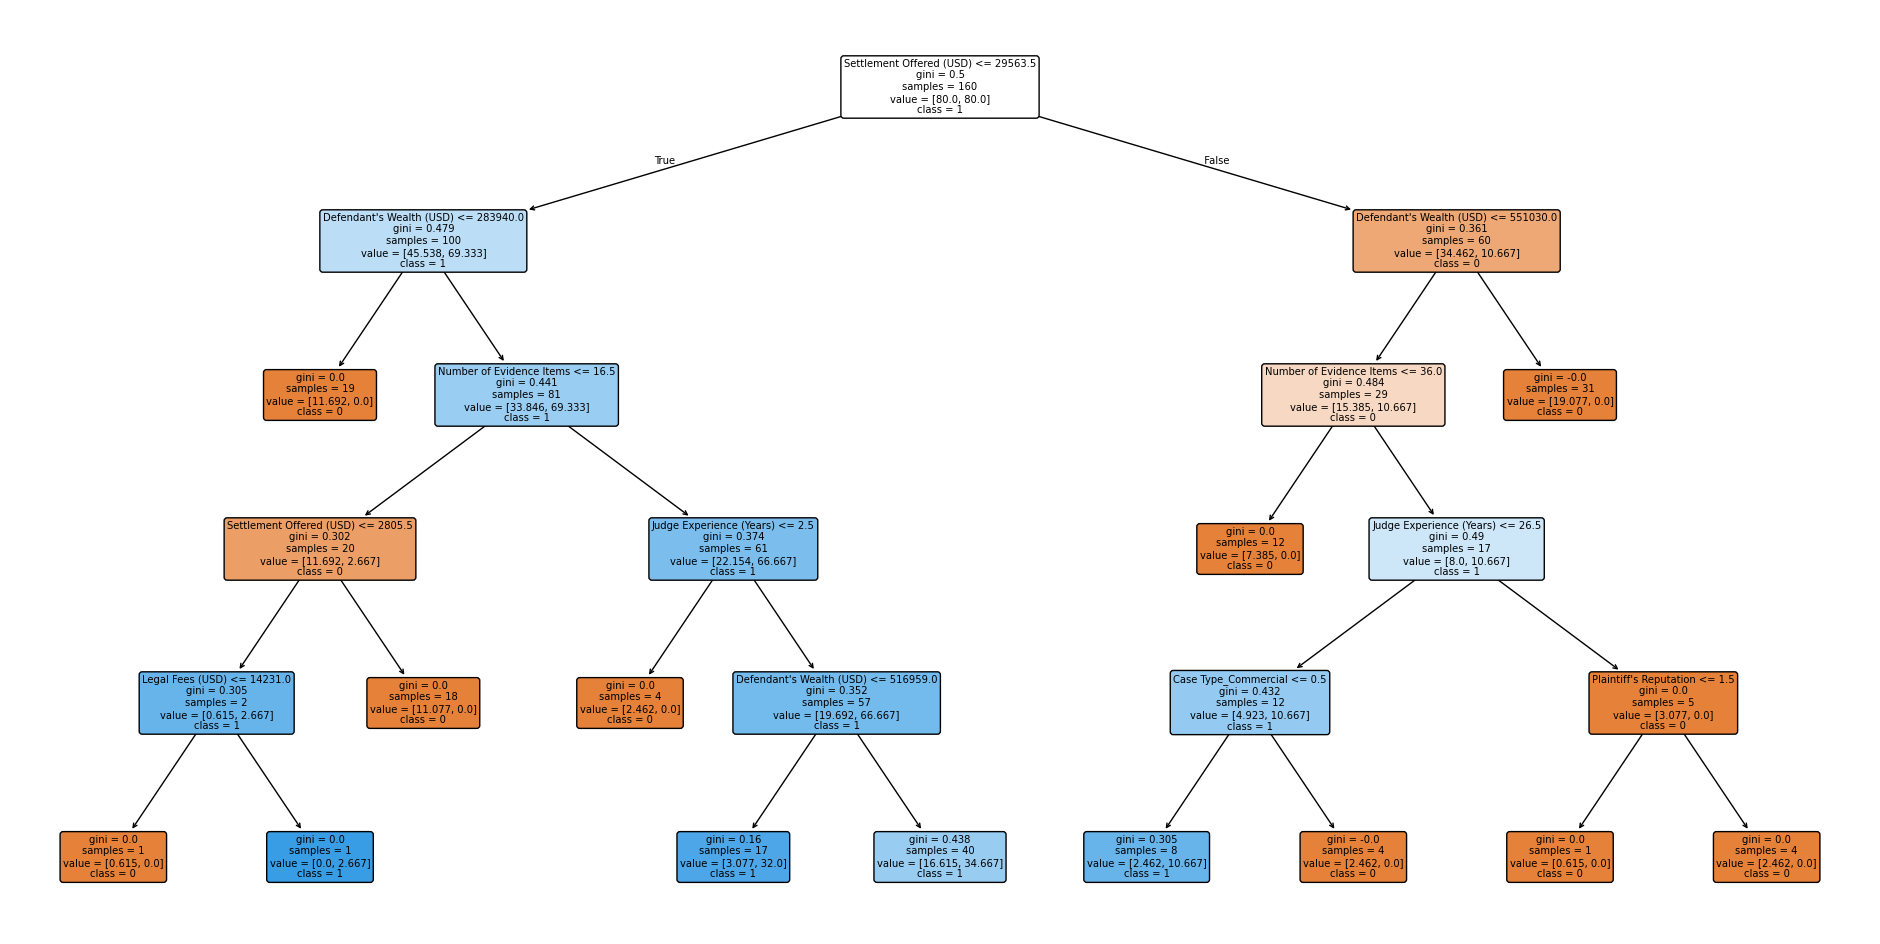

In [10]:
plt.figure(figsize=(24,12))
plot_tree(model, 
          feature_names=X.columns, 
          class_names=[str(c) for c in model.classes_], 
          filled=True, 
          rounded=True)
plt.show()

Eğitilen Model ağaç yapısında ilk basamakta uzlaşma miktarına göre bir filtreleme yapiyor,ikinci basamakta davalının servetine göre bir karar mekanizmasıyla ilerliyor devam eden basmaklarda sırasıyla kanıtsayısı,vergi miktarı,hakim deneyimi gibi karar mekanizmalarından geçirerek dava sonucuyla ilgili tahmin yürütüyor.